In [1]:
import datasets
import importlib
from matplotlib import pyplot as plt

In [2]:
configs=importlib.import_module('configs.Unet.unet_ds')
config=configs.get_config()

In [ ]:
train_dl,test_dl=datasets.create_dataloader(config)

In [4]:
data=next(iter(train_dl))
lr=data['lr']
hr=data['hr']

In [5]:
print("HR shape: [B,C,H,W]",hr.shape)
print("LR shape: [B,C,H,W]",lr.shape)

HR shape: [B,C,H,W] torch.Size([4, 1, 720, 512])
LR shape: [B,C,H,W] torch.Size([4, 1, 720, 512])


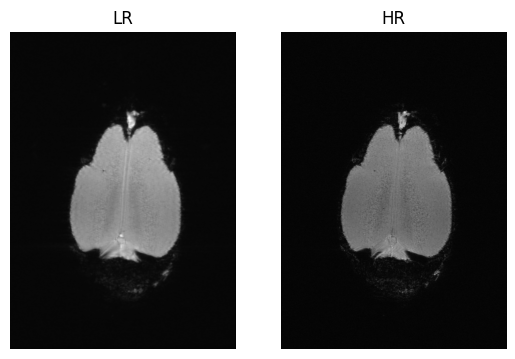

In [6]:
plt.subplot(1,2,1)
plt.imshow(lr[0].permute(1,2,0),cmap='gray')
plt.axis('off')
plt.title('LR')
plt.subplot(1,2,2)
plt.imshow(hr[0].permute(1,2,0),cmap='gray')
plt.axis('off')
plt.title('HR')
plt.show()

In [13]:
lr_numpy=lr[0].permute(1,2,0).squeeze(2).numpy()
hr_numpy=hr[0].permute(1,2,0).squeeze(2).numpy()

In [3]:
import os
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage import io

# Define paths
data_dir = '/home/arpanp/Downloads/Data/Registration_slices/test'  # Replace with your folder path
hr_dir = os.path.join(data_dir, 'HR')
lr_dir = os.path.join(data_dir, 'LR')

# Initialize lists to store PSNR and SSIM values for each image pair
psnr_values = []
ssim_values = []

# Loop through each file in the HR directory
for hr_filename in os.listdir(hr_dir):
    hr_path = os.path.join(hr_dir, hr_filename)
    lr_path = os.path.join(lr_dir, hr_filename)  # Assuming matching filenames in HR and LR

    # Ensure both HR and LR files exist
    if not os.path.exists(lr_path):
        print(f"Warning: Corresponding LR file not found for {hr_filename}")
        continue

    # Load the images
    hr_image = np.load(hr_path)
    lr_image = np.load(lr_path)

    # Compute PSNR and SSIM
    psnr_value = peak_signal_noise_ratio(hr_image, lr_image, data_range=1.0)
    ssim_value = structural_similarity(hr_image, lr_image, data_range=1.0)
    #print(f"{hr_filename}: PSNR={psnr_value:.2f}, SSIM={ssim_value:.4f}")

    # Append results to lists
    psnr_values.append(psnr_value)
    ssim_values.append(ssim_value)

# Calculate the average PSNR and SSIM
average_psnr = np.mean(psnr_values)
average_ssim = np.mean(ssim_values)

print(f"Average PSNR: {average_psnr:.2f} dB")
print(f"Average SSIM: {average_ssim:.4f}")


Average PSNR: 30.79 dB
Average SSIM: 0.7927
